**ACTIVIDAD: MOD 5 PREPROCESAMIENTO Y EDA**
* LUIS ENRIQUE HERNÁNDEZ TORRES  A01662166
* Alejandro Rosas Urdapilleta A01664648

In [44]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [45]:
# Funciones para cargar las bases de datos desde archivo CSV
def get_data1():
    return pd.read_csv("pf excel.csv", header=0)

def get_data2():
    return pd.read_csv("pf excel2.csv", header=0)

In [46]:

data1 = get_data1()
data2 = get_data2()
#print(data1)
print(data1.columns.tolist())

['DEPARTAMENTO', ' PRESUPUESTO ', ' GASTO ', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']


1. Se nos proporciono una base de datos de prueba que contiene el departamento, el presupuesto y gasto. 
Primeramente vamos a relaizar el preprocesamiento de los datos, para empezar vamos a transformar las cantidades que tienen formato de cantidades monetarias para poderlo pasar a números decimales 

In [53]:
# Limpiar nombres de columnas
data1.columns = data1.columns.str.strip()

# Seleccionar columnas relevantes
data1 = data1[['DEPARTAMENTO', 'PRESUPUESTO', 'GASTO']].copy()

# Limpiar columnas monetarias y convertir a float
for col in ['PRESUPUESTO', 'GASTO']:
    data1[col] = data1[col].astype(str).str.replace('$', '', regex=False)
    data1[col] = data1[col].str.replace('.', '', regex=False).str.replace(',', '', regex=False)
    data1[col] = pd.to_numeric(data1[col], errors='coerce')

# Eliminar filas con valores faltantes
data1.dropna(subset=['DEPARTAMENTO', 'PRESUPUESTO', 'GASTO'], inplace=True)

data1.head()


,DEPARTAMENTO,PRESUPUESTO,GASTO
1,Eq. Reparto,6818178400,2865428400
2,Subtotal,6818178400,2865428400
5,"Eq, Caracterización",3309200600,1242396700
6,Eq. Escenografía,8398379700,6579346300
7,Eq. Música,4149502900,3514842800


Cambiamos de variables categoricas las unidades especializadas de cada departamento

In [55]:
def pre_process1(data1):

    data1['DEPARTAMENTO'] = [4 if x == 'Eq. Auxiliares' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Eq, Caracterización' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Eq. Música' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Eq. Escenografía' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq Difusión Gráfica' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Fotografía' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Vestuario' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Distribución' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [5 if x == 'Eq. Guión y adaptación' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Eq. Coreografía' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Efectos Digitales' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Elécricos y maquinistas' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [1 if x == 'Eq. Reparto' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Peinado' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Eq. Dirección' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Maquillaje' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Iluminación' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Eq. Locaciones' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [5 if x == 'Editor' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [6 if x == 'Ensamble y montaje' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [6 if x == 'Eq. Inventario' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Efectos Especiales' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Eq. Producción' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Sonido Post' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [6 if x == 'Utilería' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Sonido Rodaje' else x for x in data1['DEPARTAMENTO']]

    return data1

dataPreprocesada1 = pre_process1(data1)
dataPreprocesada1['EXCEDENTE'] = dataPreprocesada1['PRESUPUESTO'] - dataPreprocesada1['GASTO']
print(dataPreprocesada1)

   DEPARTAMENTO   PRESUPUESTO        GASTO    EXCEDENTE
1             1    6818178400   2865428400   3952750000
2      Subtotal    6818178400   2865428400   3952750000
5             2    3309200600   1242396700   2066803900
6             2    8398379700   6579346300   1819033400
7             2    4149502900   3514842800    634660100
8             2    6804757700   2319547000   4485210700
9             2    8692552800   1993564400   6698988400
10            2    5428889400   3126474300   2302415100
11            2    3178213400   1088718200   2089495200
12     Subtotal   39961496500  19864889700  20096606800
15            3    4656641800   3681735600    974906200
16            3    2522746300   1944790000    577956300
17            3    1098196600    448693700    649502900
18            3    1552970600    360753900   1192216700
19            3    4974184900   4362053300    612131600
20            3    5873398700   5665237300    208161400
21            3    3823396900   1315350200   250

DEPARTAMENTO
1            2865428400
2           19864889700
3           17778614000
4           14501534200
5           10297476100
6           13240011500
Subtotal    78547953900
Total       78547953900
Name: GASTO, dtype: int64


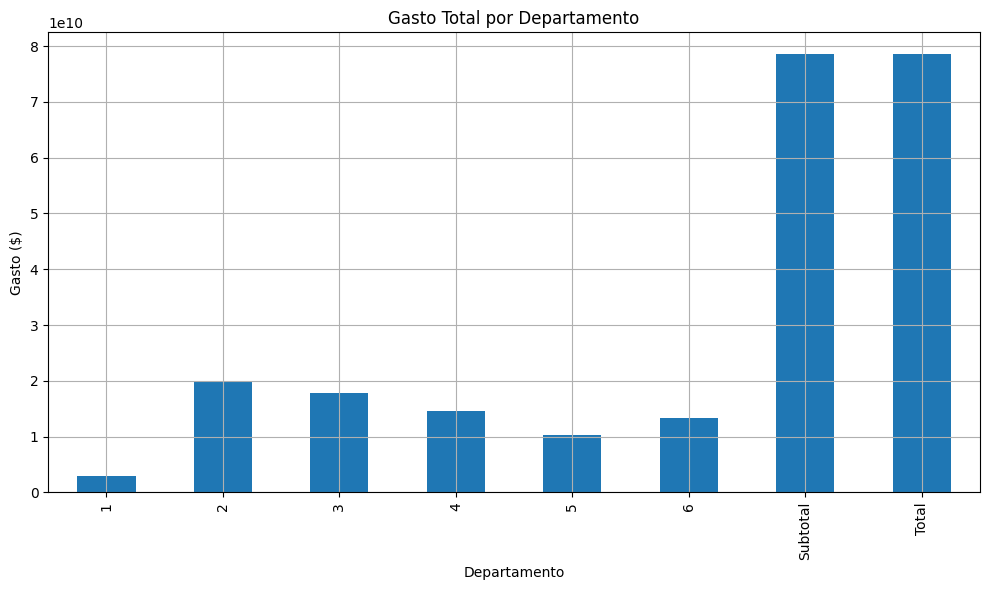

In [65]:
# Agrupar y sumar el gasto por departamento
gasto_por_departamento = dataPreprocesada1.groupby('DEPARTAMENTO')['GASTO'].sum()

# Mostrar la suma por consola
print(gasto_por_departamento)

# Graficar en barra
plt.figure(figsize=(10, 6))
gasto_por_departamento.plot(kind='bar')
plt.title('Gasto Total por Departamento')
plt.ylabel('Gasto ($)')
plt.xlabel('Departamento')
plt.grid()
plt.tight_layout()
plt.show()


DEPARTAMENTO
1            3952750000
2           20096606800
3            6722921800
4           25767104500
5            2102703300
6            8464687700
Subtotal    67106774100
Total       67106774100
Name: EXCEDENTE, dtype: int64


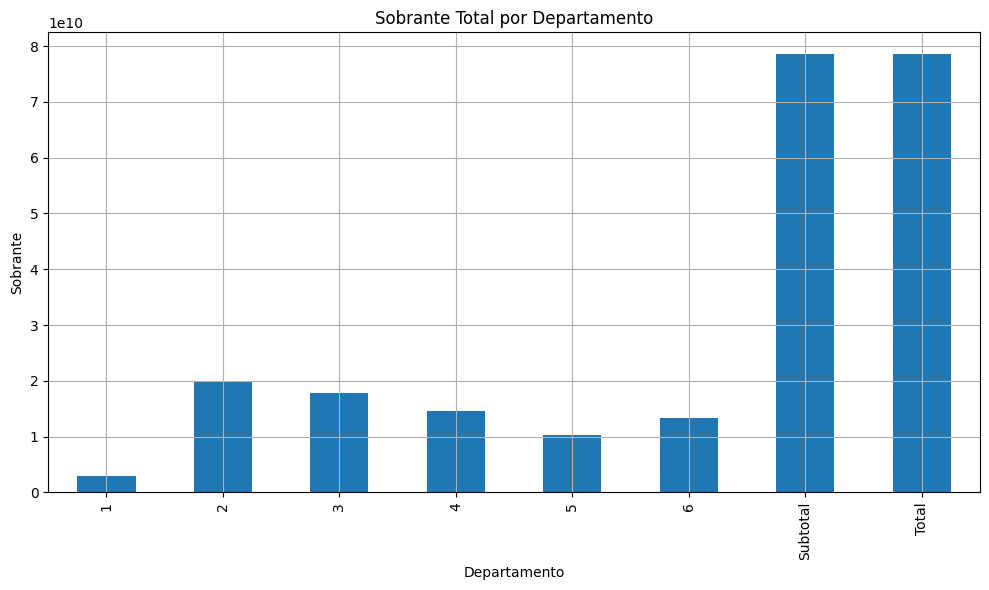

In [66]:

df2sinNa = dataPreprocesada1[dataPreprocesada1['DEPARTAMENTO'].notna() & dataPreprocesada1['EXCEDENTE'].notna()]
print(df2sinNa.groupby('DEPARTAMENTO')['EXCEDENTE'].sum())
sobrante_por_departamento = df2sinNa.groupby('DEPARTAMENTO')['EXCEDENTE'].sum()
plt.figure(figsize=(10, 6))
gasto_por_departamento.plot(kind='bar')
plt.title('Sobrante Total por Departamento')
plt.ylabel('Sobrante')
plt.xlabel('Departamento')
plt.grid()
plt.tight_layout()
plt.show()

In [67]:
data2.columns = data2.columns.str.strip()
data2['GASTO'] = data2['GASTO'].astype(str)
data2['GASTO'] = data2['GASTO'].str.replace('$', '', regex=False)
data2['GASTO'] = data2['GASTO'].str.replace('.', '', regex=False)
data2['GASTO'] = data2['GASTO'].str.replace(',', '', regex=False)
data2['GASTO'] = pd.to_numeric(data2['GASTO'], errors='coerce')
data2 = data2[['FECHA','DEPARTAMENTO', 'UNIDAD ESP.', 'GASTO']]
data2

,FECHA,DEPARTAMENTO,UNIDAD ESP.,GASTO
0,2024-11-11,1,26,4212534
1,2024-11-11,1,26,2025257
2,2024-11-16,2,25,6460463
3,2024-11-16,2,24,18277183
4,2024-11-20,2,23,21711843
...,...,...,...,...
73,2025-04-04,4,18,11428164
74,2025-04-09,1,26,1863236
75,2025-04-12,3,3,22094425
76,2025-04-14,3,10,6417807


In [68]:
unidades_unicas = data2['UNIDAD ESP.'].unique()
print(unidades_unicas)
print(len(unidades_unicas))
print(data1.columns.tolist())

[26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3
  2  1]
26
['DEPARTAMENTO', 'PRESUPUESTO', 'GASTO', 'EXCEDENTE']


Como ya tenemos la lista de cada uno de los conceptos de cada gasto ahora vamos a realizar un preprocesamiento de datos para el segundo conjunto de datos denotado como 'data2' 

In [69]:
def pre_process(data2):

    data2['UNIDAD ESP.'] = [26 if x == 'Eq. Auxiliares' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [25 if x == 'Eq, Caracterización' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [24 if x == 'Eq. Música' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [23 if x == 'Eq. Escenografía' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [22 if x == 'Eq Difusión Gráfica' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [21 if x == 'Fotografía' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [20 if x == 'Vestuario' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [19 if x == 'Distribución' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [18 if x == 'Eq. Guión y adaptación' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [17 if x == 'Eq. Coreografía' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [16 if x == 'Eq. Efectos Digitales' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [15 if x == 'Eq. Elécricos y maquinistas' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [14 if x == 'Eq. Reparto' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [13 if x == 'Peinado' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [12 if x == 'Eq. Dirección' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [11 if x == 'Maquillaje' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [10 if x == 'Eq. Iluminación' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [9 if x == 'Eq. Locaciones' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [8 if x == 'Editor' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [7 if x == 'Ensamble y montaje' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [6 if x == 'Eq. Inventario' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [5 if x == 'Eq. Efectos Especiales' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [4 if x == 'Eq. Producción' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [3 if x == 'Eq. Sonido Post' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [2 if x == 'Utilería' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [1 if x == 'Eq. Sonido Rodaje' else x for x in data2['UNIDAD ESP.']]

    data2['DEPARTAMENTO'] = [1 if x == 'Producción' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [2 if x == 'Arte y Diseño' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [3 if x == 'Rec. Técnicos' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [4 if x == 'Creativo' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [5 if x == 'Contratación' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [6 if x == 'Logística' else x for x in data2['DEPARTAMENTO']]
    

    return data2

dataPreprocesada = pre_process(data2)
print(dataPreprocesada)

        FECHA  DEPARTAMENTO  UNIDAD ESP.     GASTO
0  2024-11-11             1           26   4212534
1  2024-11-11             1           26   2025257
2  2024-11-16             2           25   6460463
3  2024-11-16             2           24  18277183
4  2024-11-20             2           23  21711843
..        ...           ...          ...       ...
73 2025-04-04             4           18  11428164
74 2025-04-09             1           26   1863236
75 2025-04-12             3            3  22094425
76 2025-04-14             3           10   6417807
77 2025-04-16             1           19  13423146

[78 rows x 4 columns]


In [70]:
dataPreprocesada.info()
#unicosDepartamentos = data2['DEPARTAMENTO'].unique()
#print(unicosDepartamentos)
#print(len(unicosDepartamentos))
#print(data2.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         78 non-null     datetime64[ns]
 1   DEPARTAMENTO  78 non-null     int64         
 2   UNIDAD ESP.   78 non-null     int64         
 3   GASTO         78 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.6 KB


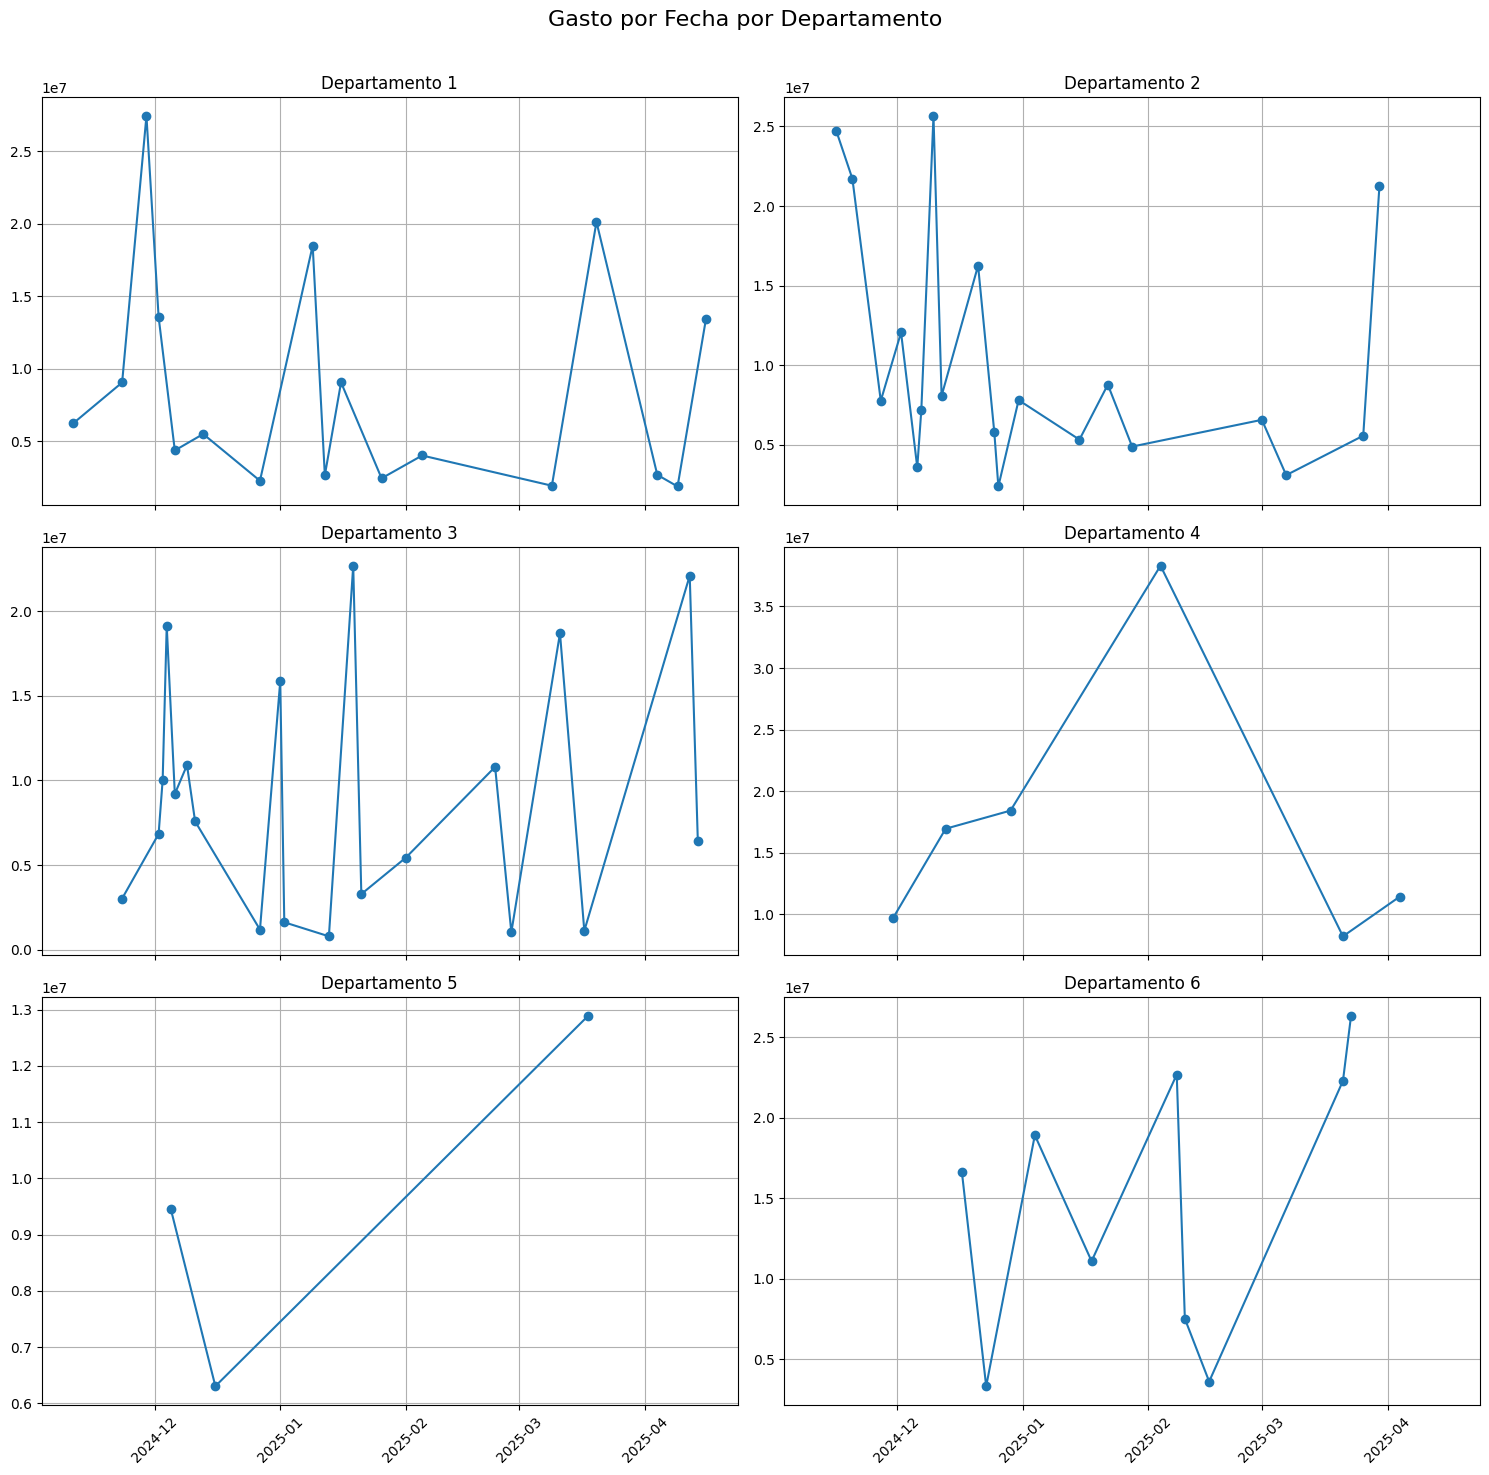

In [71]:

dataPreprocesada['FECHA'] = pd.to_datetime(dataPreprocesada['FECHA'], format='%d/%m/%y')

df_grouped = dataPreprocesada.groupby(['FECHA', 'DEPARTAMENTO'])['GASTO'].sum().reset_index()

departamentos = sorted(df_grouped['DEPARTAMENTO'].unique())

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True)
axes = axes.flatten()  

for i, dept in enumerate(departamentos):
    data = df_grouped[df_grouped['DEPARTAMENTO'] == dept]
    axes[i].plot(data['FECHA'], data['GASTO'], marker='o')
    axes[i].set_title(f'Departamento {dept}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Gasto por Fecha por Departamento', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


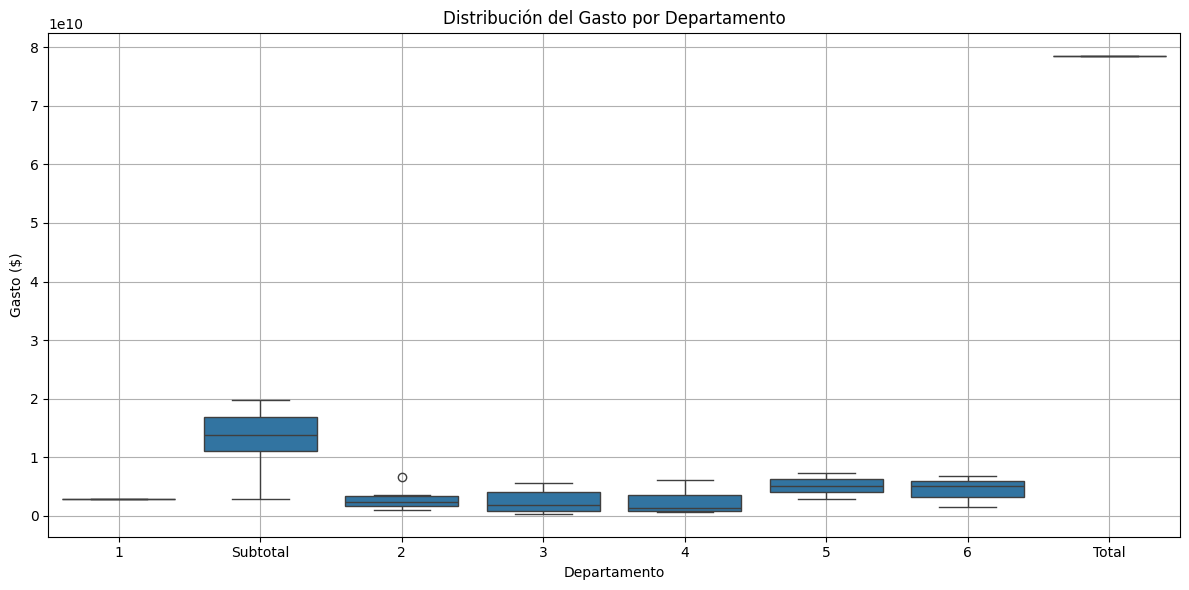

In [72]:
# Aqui creamos un boxplot para ver la distribucion de todo el gasto por departamento
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEPARTAMENTO', y='GASTO', data=dataPreprocesada1)
plt.title('Distribución del Gasto por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Gasto ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


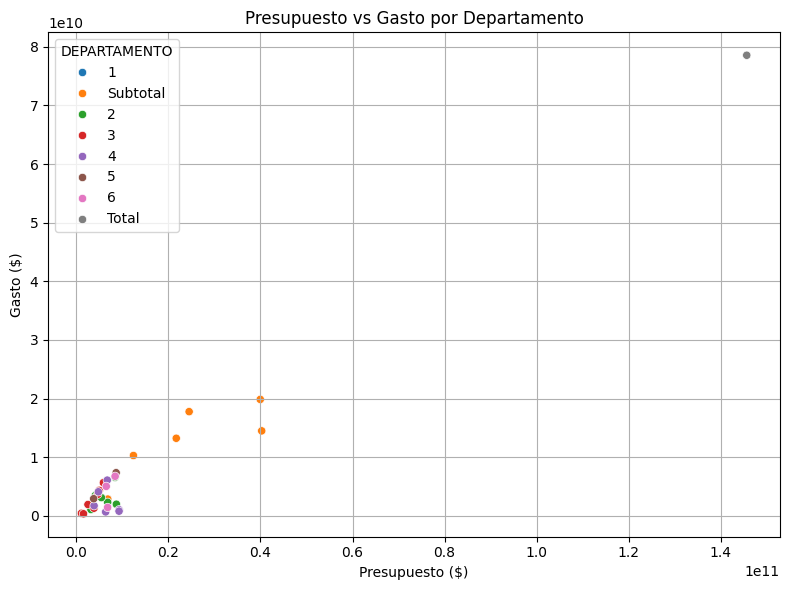

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRESUPUESTO', y='GASTO', hue='DEPARTAMENTO', data=data1)
plt.title('Presupuesto vs Gasto por Departamento')
plt.xlabel('Presupuesto ($)')
plt.ylabel('Gasto ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
